In [6]:
# Perceptron
%matplotlib inline
import random 
# imports basicos
import numpy as np
import scipy as sp
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt  # http://matplotlib.org/api/pyplot_api.html
import math
# from numpy import array, dot, random
from sklearn import cross_validation
 
from IPython.display import Image
from IPython.core.pylabtools import figsize, getfigs

figsize(11, 9)
plt.style.use('ggplot')
pd.set_option('display.max_columns',300)
pd.set_option('display.width', 4000)


In [7]:
# plot_decision_boundary(lambda x: clf.predict(x), x, y)
  
def plot_decision_boundary(pred_func, xi, yi):
    # Set min and max values and give it some padding
    x_min, x_max = xi[:, 0].min() - .5, xi[:, 0].max() + .5
    y_min, y_max = xi[:, 1].min() - .5, xi[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(xi[:, 0], xi[:, 1], c=yi, cmap=plt.cm.Spectral)
    plt.show()

In [8]:
def csvImporter():
#    data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
    data = pd.read_csv('iris.data', header=None, names=['sl','sw','pl','pw','class'])
    return data
print(csvImporter().head())
# 7. Attribute Information:
#    1. sepal length in cm
#    2. sepal width in cm
#    3. petal length in cm
#    4. petal width in cm
#    5. class: 
#       -- Iris Setosa
#       -- Iris Versicolour
#       -- Iris Virginica
csvImporter().describe()

    sl   sw   pl   pw        class
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data1 = csvImporter()
data1 = data1[['sl','sw','class']]
data1 = data1[data1['class'].isin(['Iris-setosa','Iris-virginica'])]
data1.replace({'Iris-setosa': 0},inplace=True, regex=True)
data1.replace({'Iris-virginica': 1},inplace=True, regex=True)
print(data1.head())
print(data1.describe())
print('-- Count')
print(data1['class'].value_counts())

    sl   sw  class
0  5.1  3.5      0
1  4.9  3.0      0
2  4.7  3.2      0
3  4.6  3.1      0
4  5.0  3.6      0
               sl          sw       class
count  100.000000  100.000000  100.000000
mean     5.797000    3.196000    0.500000
std      0.945319    0.416071    0.502519
min      4.300000    2.200000    0.000000
25%      5.000000    3.000000    0.000000
50%      5.700000    3.150000    0.500000
75%      6.500000    3.400000    1.000000
max      7.900000    4.400000    1.000000
-- Count
1    50
0    50
Name: class, dtype: int64


In [10]:
#converte de pandas para numpy
x = data1[['sl','sw']].values
# print(x)
print(x.shape)
y = data1[['class']].values
y.shape = (100,)
print(y.shape)


(100, 2)
(100,)


AttributeError: 'str' object has no attribute 'decode'

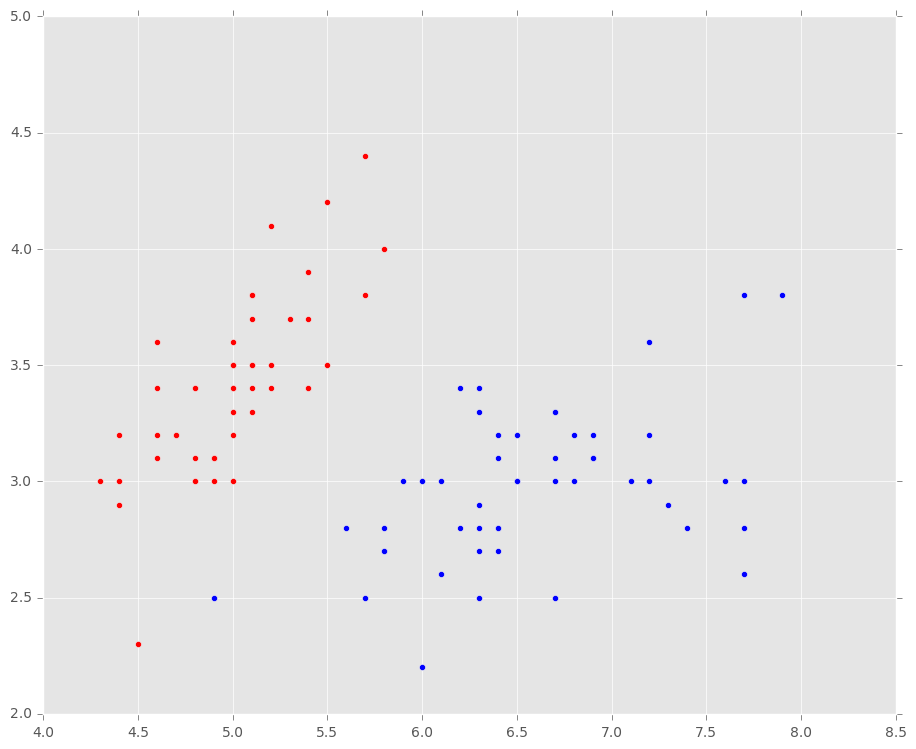

In [11]:
# x = data1['sl'].values
# y = data1['sw'].values
# color = data1['class'].replace({'0': 'r'},regex=True).replace({'1': 'b'},regex=True).values

colors =  'rb'
classes = [0,1] 
labels = ['Iris-setosa','Iris-virginica']
plt.figure()

for i,l,color in zip(classes,labels , colors):
    idx = np.where(y == i)
    plt.scatter(x[idx, 0], x[idx, 1], c=color, label=l, cmap=plt.cm.Paired)
plt.title('Iris'.decode('utf-8'))
plt.xlabel("Sepal Lenght")
plt.ylabel("Sepal Width")
plt.legend(loc=1)  # best->0 upper right->1 upper left->2 lower left->3 lower right->4 

plt.show()

In [19]:

class SimplePerceptron():
    def __init__(self):
        self.errors = []
        self.learning_rate = 0.2

        # weights
        self.w = np.random.rand(2)

    def step_function(self,v):
        return 0 if v < 0 else 1

    def forward(self,x):
        v = np.dot(self.w,x)
        return self.step_function(v)

#     self.np_forward = np.vectorize(self.forward)


    # como o scikit learn
    def fit(self,x,y, total_epochs=500, debug=False):
        training_size = x.shape[0]
            
        print("training size: {}".format(training_size))

        for epoch in range(training_size):
            i = random.randint(0,training_size-1)
            expected = y[i] 
            output = self.forward(x[i])
            error = expected - output
            self.errors.append(error)
            delta = self.learning_rate * error
            if debug:
                print("i:{:,}, x:{}, y:{}, w:{}, output: {}, error:{}, delta:{}".format(i, x[i], y[i], self.w, output, error, delta))
            self.w += delta * x[i]

            
    # como o scikit learn
    def predict(self, x):
        result = []
        for xi in x:
            result.append(self.forward(xi))
        return np.array(result)
            
            
    def print_result(self,x,y):
        for xi, yi in zip(x,y):
            result = self.forward(xi)
            print("x:{}, y:{}, result:{}".format(xi, yi, result))

    def acuracia(self,x,y):
        correct = 0
        wrong = 0
        for xi, yi in zip(x,y):
            result = self.forward(xi)
            if result == yi:
                correct += 1
            else:
                wrong += 1
        return correct,wrong
        

p = SimplePerceptron()
p.fit(x,y,debug=False)

print('-'*40)
correct,wrong = p.acuracia(x,y)
print('Corrects: {:,}'.format(correct) )
print('Wrong   : {:,}'.format(wrong) )

# print(p.predict(x));


training size: 100
----------------------------------------
Corrects: 99
Wrong   : 1


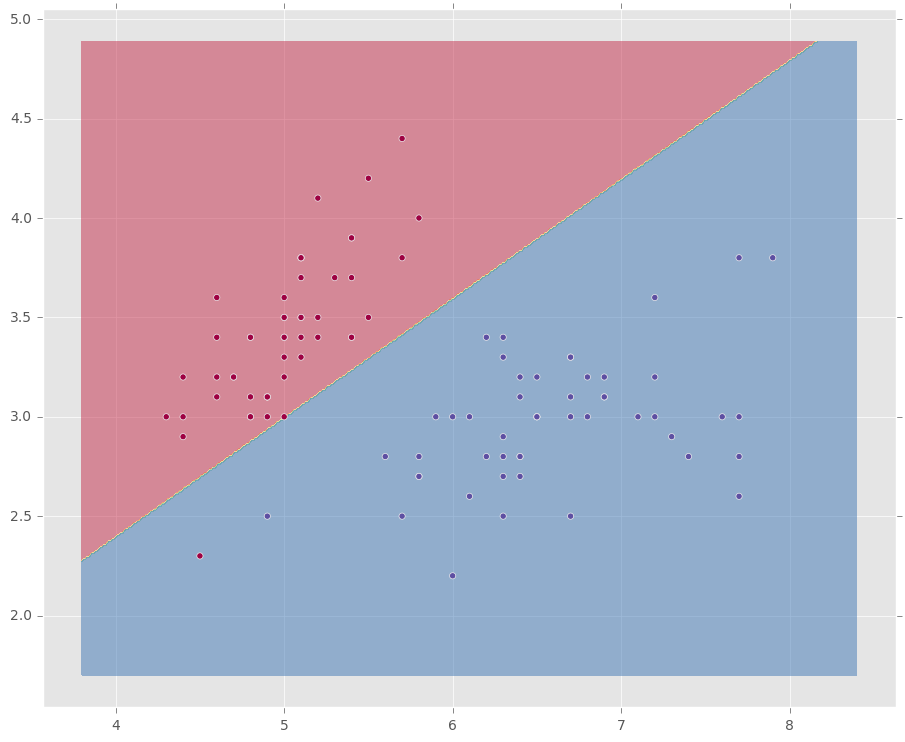

In [21]:
# print(w)
# print(x)
# print(y)
plt.figure()

# Set min and max values and give it some padding
x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole gid
Z = p.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral,alpha=0.5)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Spectral)
plt.show()



In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
# fold_indexes = cross_validation.StratifiedKFold(y, n_folds=4, shuffle=True)
fold_indexes = cross_validation.KFold(len(y), n_folds=4, shuffle=True)
for train_index, test_index in fold_indexes:
    print(train_index, test_index)

[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 17 18 20 21 22 23 25 26 29 31
 33 34 35 36 37 38 39 41 42 44 45 46 47 48 50 51 52 54 56 57 58 60 61 62 64
 65 67 68 69 70 72 73 74 75 76 78 79 80 83 84 85 86 87 88 89 91 93 96 97 99] [11 16 19 24 27 28 30 32 40 43 49 53 55 59 63 66 71 77 81 82 90 92 94 95 98]
[ 1  2  3  4  5  6  8  9 10 11 13 14 16 17 19 20 22 23 24 25 26 27 28 29 30
 31 32 33 36 37 40 43 44 45 46 47 48 49 50 52 53 54 55 56 57 58 59 60 61 63
 64 66 68 70 71 73 74 75 76 77 80 81 82 83 84 86 87 89 90 91 92 94 95 96 98] [ 0  7 12 15 18 21 34 35 38 39 41 42 51 62 65 67 69 72 78 79 85 88 93 97 99]
[ 0  1  3  4  5  7  8 10 11 12 13 15 16 18 19 20 21 23 24 27 28 30 31 32 34
 35 36 38 39 40 41 42 43 46 47 49 50 51 53 54 55 56 59 60 61 62 63 64 65 66
 67 69 70 71 72 73 77 78 79 80 81 82 85 87 88 90 91 92 93 94 95 96 97 98 99] [ 2  6  9 14 17 22 25 26 29 33 37 44 45 48 52 57 58 68 74 75 76 83 84 86 89]
[ 0  2  6  7  9 11 12 14 15 16 17 18 19 21 22 24 25 26 27 28 29 30 32 33 34
 35 37

In [25]:
import sklearn.metrics as metrics

acuracia = []

for i,(train_index, test_index) in enumerate(fold_indexes):
    print("-"*30)
    print("FOLDER {}".format(i))
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    p = SimplePerceptron()
    p.fit(x_train,y_train)
    y_test_pred = p.predict(x_test)

    cm = metrics.confusion_matrix(y_test, y_test_pred)
    
    acuracia.append(metrics.accuracy_score(y_test, y_test_pred, normalize=True))
    
    print(cm)
    print(metrics.classification_report(y_test, y_test_pred))
    
for a in acuracia:
    print(a)
print("Acuracia média: {}".format(np.mean(acuracia)))
print("Desvio Padrão : {}".format(np.std(acuracia)))


------------------------------
FOLDER 0
training size: 75
[[11  0]
 [ 0 14]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      1.00      1.00        14

avg / total       1.00      1.00      1.00        25

------------------------------
FOLDER 1
training size: 75
[[12  0]
 [ 5  8]]
             precision    recall  f1-score   support

          0       0.71      1.00      0.83        12
          1       1.00      0.62      0.76        13

avg / total       0.86      0.80      0.79        25

------------------------------
FOLDER 2
training size: 75
[[14  0]
 [ 1 10]]
             precision    recall  f1-score   support

          0       0.93      1.00      0.97        14
          1       1.00      0.91      0.95        11

avg / total       0.96      0.96      0.96        25

------------------------------
FOLDER 3
training size: 75
[[13  0]
 [ 0 12]]
             precision    recall  f1-score   su

In [31]:
import sklearn.metrics as metrics

import sklearn.neural_network.MLPClassifier  #  pip install scikit-neuralnetwork

acuracia = []


for i,(train_index, test_index) in enumerate(fold_indexes):
    print("-"*30)
    print("FOLDER {}".format(i))
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # http://scikit-learn.org/dev/modules/generated/sklearn.neural_network.MLPClassifier.html
    p = sklearn.neural_network.MLPClassifier(solver='sgd', activation='logistic', alpha=1e-2,
            hidden_layer_sizes=(2), random_state=1, verbose=True)
    
    p.fit(x_train,y_train)
    print(p)
    y_test_pred = p.predict(x_test)

    cm = metrics.confusion_matrix(y_test, y_test_pred)
    
    acuracia.append(metrics.accuracy_score(y_test, y_test_pred, normalize=True))
    
    print(cm)
    print(metrics.classification_report(y_test, y_test_pred))
    
for a in acuracia:
    print(a)
print("Acuracia média: {}".format(np.mean(acuracia)))
print("Desvio Padrão : {}".format(np.std(acuracia)))

ImportError: No module named 'sklearn.neural_network.MLPClassifier'

In [ ]:
#lista5
